In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Exercise 1

Let us consider the sequence $U_n$ given by 
\begin{equation}\label{fib}
\left\lbrace 
\begin{array}{ll}
U_0 &= 1,\\
U_1 &= 2,\\
U_{n} &=-3U_{n-1} +U_{n-2}, \;\; \forall\; n=2,3,4\cdots
\end{array}\right. 
\end{equation}

Write a python function named  <b>SeqTerms</b> that takes as input an integer $n,\;\;n\geq 0$ and return an array of the first $n$ terms (i.e. $U_0, \cdots, U_{n-1}$) of the sequence \eqref{fib}.

<font color='red'><b> The code should return an array of one or two when (n=0 or n =1), for other inputs the code works properly, you may need to print the results as an array not as a list.  <b></font>

In [3]:
import numpy as np
def Seq(n):
    a=1
    b=2
    if n==0:
        return 1
    if n==1:
        return 2
    for i in range(2,n+1):
        c=-3*b+a
        a=b
        b=c
    return c
Seq(2)
def SeqTerms(n):
    l=[]
    g=np.vectorize(Seq)
    for i in range(n):
        l+=[Seq(i)]
    return l
SeqTerms(1)

[1]

# Exercise 2

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = A$$


1. Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return A


<font color='red'><b> Correct. </b></font>


In [8]:
def trap(a,b,N,f):
    C=np.linspace(a,b,N+1)
    g=np.vectorize(f)
    A=g(C)
    S=0
    for i in range(1,len(A)):
        S+=A[i]+A[i-1]
    K=1/2*S*((b-a)/N)
    return K
f= lambda x: x**3+7
trap(0,1,10**6,f)

7.250000000000129

2. Write a Python code to compute and display an approximation $Aquad$ of  the integral bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

<font color='red'><b> Correct. </b></font>

In [9]:
from scipy.integrate import quad
a = 0
b = 2
f = lambda x: (x**3+5*x-20)/(x**2+3)
Aquad= quad(f, a, b)[0]
print(Aquad)

-7.049316535735796


3. write a Python function <b>ErrorTrap</b> that takes $M$ as input and return an arrays $ErrorInt$ and $ListN$. Here, $ErrorInt$ contains the absolute errors between $Aquad$ and the approximation of the integral $A$ obtained using the function <b>Trap</b> for all positve intergers $N$ in $ListN$ the set of all multiples of 10 less or equal to $M$.


<font color='red'><b> Correct. </b></font>

In [22]:
def ErrorTrap(M):
    u= lambda x: abs(quad(f,0,2)[0]-trap(0,2,x,f))
    ListN=[]
    #ErrorInt=np.zeros(M)
    for i in range(1,M+1):
        if i%10==0:
            ListN+=[i]
    g=np.vectorize(u)
    ErrorInt=g(ListN)
    return ErrorInt, ListN
ErrorTrap(100)    

(array([3.07950054e-03, 7.70701307e-04, 3.42601551e-04, 1.92726674e-04,
        1.23349010e-04, 8.56605200e-05, 6.29349176e-05, 4.81848732e-05,
        3.80721757e-05, 3.08385649e-05]),
 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

4. Plot the output $ErrorInt$ against $ListN$ for $M=200$

<font color='red'><b> You were asked to plot not to print the ListN and ErrorInt.</b></font>

In [23]:
𝐸𝑟𝑟𝑜𝑟𝐼𝑛𝑡 , 𝐿𝑖𝑠𝑡𝑁 = ErrorTrap(200)
print(𝐿𝑖𝑠𝑡𝑁)  
print(ErrorInt)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[3.07950054e-03 7.70701307e-04 3.42601551e-04 1.92726674e-04
 1.23349010e-04 8.56605200e-05 6.29349176e-05 4.81848732e-05
 3.80721757e-05 3.08385649e-05 2.54864800e-05 2.14157629e-05
 1.82477772e-05 1.57340710e-05 1.37061368e-05 1.20464185e-05
 1.06708827e-05 9.51816892e-06 8.54262634e-06 7.70972323e-06]


# Exercise 3

1. Write code to solve the following system of ordinary differential equations using the Python function odeint.

$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$

Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$.

<font color='red'><b>Correct.<b></font>

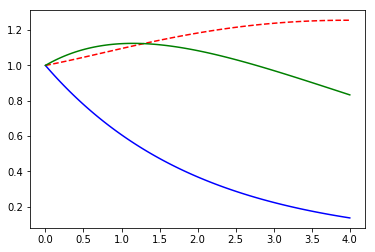

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    x_1,x_2,x_3 = z
    dx_1dt = -1/2*x_1 
    dx_2dt = 1/2*x_1 -1/4*x_2
    dx_3dt = 1/4*x_2-1/6*x_3
    return dx_1dt,dx_2dt,dx_3dt

# initial condition
z0 = [1,1,1]

# time points
a = 0
b = 4
N = 100
t = np.linspace(a,b,N+1)

# solve ODE
z = odeint(model,z0,t)

x_1 = z[:,0]
x_2 = z[:,1]
x_3=z[:,2]


plt.plot(t,x_1,'b-')
plt.plot(t,x_3,'r--')
plt.plot(t,x_2,'green');


In [7]:
def f(z,t):
    x1,x2,x3=z
    dx1dt=-1/2*z[0]
    dx2dt=1/2*z[0]-1/4*z[1]
    dx3dt=1/4*z[1]-1/6*z[2]
    return dx1dt, dx2dt,dx3dt
#f(6,7)

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


<font color='red'><b>Correct.<b></font>

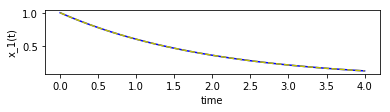

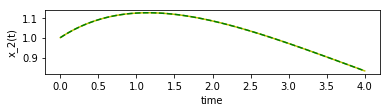

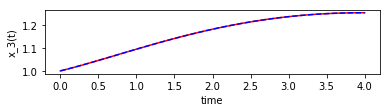

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# x_1(t)=np.exp(-t/2)
# x_2(t)=-2*np.exp(-t/2)+3*np.exp(-t/4)
# x_3(t)=3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6)
# #plot results
plt.subplot(3,1,1)
plt.plot(t,np.exp(-t/2),'b')
plt.plot(t,x_1,'y--')
plt.xlabel('time')
plt.ylabel('x_1(t)')
plt.show()

#plot results
plt.subplot(3,1,2)
plt.plot(t,-2*np.exp(-t/2)+3*np.exp(-t/4),'y-')
plt.plot(t,x_2,'g--')
plt.xlabel('time')
plt.ylabel('x_2(t)')
plt.show()

plt.subplot(3,1,3)
plt.plot(t,3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6),'r-')
plt.plot(t,x_3,'b--')
plt.xlabel('time')
plt.ylabel('x_3(t)')
plt.show()

#plot results
# plt.subplot(3,1,3)
# plt.plot(x,y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


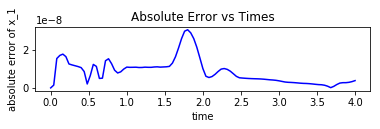

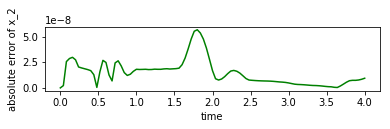

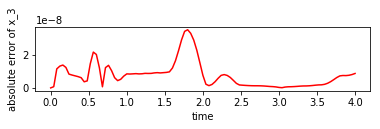

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# x_1(t)=np.exp(-t/2)
# x_2(t)=-2*np.exp(-t/2)+3*np.exp(-t/4)
# x_3(t)=3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6)
# #plot results

plt.subplot(3,1,1)
plt.title("Absolute Error vs Times")
#plt.plot(t,np.exp(-t/2),'b')
plt.plot(t,abs(x_1-np.exp(-t/2)),'b-')
plt.xlabel('time')
plt.ylabel('absolute error of x_1')
plt.show()

#plot results
plt.subplot(3,1,2)
#plt.plot(t,-2*np.exp(-t/2)+3*np.exp(-t/4),'g-')
plt.plot(t,abs(x_2+2*np.exp(-t/2)-3*np.exp(-t/4)),'g-')
plt.xlabel('time')
plt.ylabel('absolute error of x_2')
plt.show()

plt.subplot(3,1,3)
#plt.plot(t,3/2*np.exp(-t/2)-9*np.exp(-t/4)+17/2*np.exp(-t/6),'r-')
plt.plot(t,abs(x_3-3/2*np.exp(-t/2)+9*np.exp(-t/4)-17/2*np.exp(-t/6)),'r-')
plt.xlabel('time')
plt.ylabel('absolute error of x_3')
plt.show()

#plot results
# plt.subplot(3,1,3)
# plt.plot(x,y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


# Exercise 4

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


<font color='red'><b>The structure is fine.<b></font>

In [24]:
def EulerOdeSys(f,c,t):
    n=len(t)
    Z = np.zeros((len(t),)+ np.shape(c))  
    Z[0]= c  
    for i in range(n-1):
        h =(t[i+1] - t[i])
        Z[i+1]= Z[i]+ h*f(Z[i],t[i])
    return Z
def f(x,y):
    return x+y
c=[5,3]
t=np.linspace(0,4,10)
EulerOdeSys(f,c,t)
  

array([[  5.        ,   3.        ],
       [  7.22222222,   4.33333333],
       [ 10.62962963,   6.45679012],
       [ 15.74897119,   9.72153635],
       [ 23.34110654,  14.63481177],
       [ 34.50505512,  21.92929601],
       [ 50.8282895 ,  32.66330411],
       [ 74.60382557,  48.36551335],
       [109.14379743,  71.2440131 ],
       [159.23239876, 104.48826584]])

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



<font color='red'><b>Correct<b></font>

In [110]:
def RK4OdeSys(f,c,t):
    n = len (t)
    Z = np.zeros((len(t),)+ np.shape(c))  
    Z[0]= c  
    for i in range (n-1):
        k1 = f(Z[i] ,t[i])  
        h =(t[i+1] - t[i])/2
        k2 = f(Z[i]+ h*k1 , t[i]+h)
        k3 = f(Z[i]+ h*k2 , t[i]+h)
        k4 = f(Z[i]+2*h*k3 ,t[i]+2*h )
        Z[i+1]= Z[i]+ h/3*(k1 +2*k2 +2*k3+k4 ) 
    return Z

def f(x,y):
    return x+y**2
c=[5,2]
t=np.linspace(0,4,10)
RK4OdeSys(f,c,t)
#plt.plot(RK4OdeSys1(f,c,t),'b-') 

array([[  5.        ,   2.        ],
       [  7.83021445,   3.15181177],
       [ 12.45659697,   5.16077975],
       [ 20.10506952,   8.72747924],
       [ 32.68741769,  14.94443472],
       [ 53.18500904,  25.51540266],
       [ 86.24718959,  43.09733603],
       [139.12446363,  71.83366675],
       [223.12375742, 118.18594254],
       [355.87785565, 192.23073745]])

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

<font color='red'><b>Not done.<b></font>

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

<font color='red'><b>Not done.<b></font>

1.791759469228055

# Exercise 5

Let consider us consider the function <b> primes </b> that takes $n$ as input and return a list of primes less than $n$

In [25]:
# This cell is only to import the labraries 

import numpy as np
import time

def primes(n):
    """ Returns  a list of primes < n """
    sieve = [True] * (n//2)
    for i in range(3,int(n**0.5)+1,2):
        if sieve[i//2]:
            sieve[i*i//2::i] = [False] * ((n-i*i-1)//(2*i)+1)
    return [2] + [2*i+1 for i in range(1,n//2) if sieve[i]]


For any integer $n>0$ and a prime number $p$, define $\nu_p(n)$ as the greatest integer $r$ such that $p^r$ divides $n$.
Define $$ D(n,m) = \sum_{p\; prime} \Bigl| \nu_p(n) - \nu_p(m)\Bigr| $$

For example $D(14,24)=4$.

Furthermore, define

$$S(N)  = \sum_{n=1}^{N}\sum_{m=1}^{N}D(n,m).$$

You are given $S(10)=210$.

1. Write an efficient python function, <b>Func_S </b>, that takes $N$ as input and return the value $S(N)$.

<font color='red'><b>Correct.<b></font>


In [30]:
from math import floor 
from math import log as ln
def nu(n,p):
    L=[]
    for i in range(floor(ln(n)//ln(p))+2):
        if n%(p**i)==0:
            L+=[i]
    return L[-1]

def D(n,m):
    list_prime=primes(max(m,n)+1)
    SumD=0
    for i in list_prime:
        SumD+=abs(nu(n,i)-nu(m,i))
        
    return SumD


print(D(14,24))

def Func_S(N):
    s=0
    for i in range(1,N+1):
        for j in range(1,N+1):
            #if j!=i:
            s=s+D(i,j)
    return s
   
Func_S(10)     
nu(7,23)


4


0

2. Compute $S(10)$ and display its computational time

In [29]:
N = 10
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

S(10) =  210
computational Time =  0.0028889940003864467


3. Compute $S(100)$ and display its computational time

In [166]:
N = 100
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

S(100) =  37018
computational Time =  0.4434022469940828


4. Compute $S(1000)$ and display its computational time

In [8]:
N = 1000
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

S(1000) =  4654406
computational Time =  256.6060328760068


5. Compute $S(10000)$ and display its computational time

<font color='red'><b>You were asked to compute S(10) and so on. There is no outputs for that. This was meant to test the efficiency for your algorithm.<b></font>

In [ ]:
N = 10000
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

6. Compute $S(100000)$ and display its computational time

In [ ]:
N = 100000
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

7. Compute $S(1000000)$ and display its computational time

In [ ]:
N = 1000000
time_start = time.perf_counter()
S = Func_S(N)
time_elapsed = (time.perf_counter() - time_start)
print('S({}) =  {}'.format(N,S))
print('computational Time = ', time_elapsed)

# Exercise 6 
1. Read the Covid-19 dataset

In [177]:
import pandas as pd
import numpy as np
a=pd.read_csv('Covid-19.csv')
a

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
149542,2021-09-20,ZW,Zimbabwe,AFRO,199,127938,4,4567
149543,2021-09-21,ZW,Zimbabwe,AFRO,248,128186,2,4569
149544,2021-09-22,ZW,Zimbabwe,AFRO,0,128186,0,4569
149545,2021-09-23,ZW,Zimbabwe,AFRO,618,128804,23,4592


2. Drop the Country code column


In [178]:
del a['Country_code']
a

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
149542,2021-09-20,Zimbabwe,AFRO,199,127938,4,4567
149543,2021-09-21,Zimbabwe,AFRO,248,128186,2,4569
149544,2021-09-22,Zimbabwe,AFRO,0,128186,0,4569
149545,2021-09-23,Zimbabwe,AFRO,618,128804,23,4592


3. Randomely choose three different countries

In [179]:
a.sample(n=3)
b=a['Country']
rand=b.sample(n=3)
rand
# b=a.sample(n=3)
# b

47232          French Polynesia
28957                     Congo
114118    Saint Kitts and Nevis
Name: Country, dtype: object

4. Select and display the records for those three countries

In [180]:
q=a[a['Country'].isin(rand)]
q

,Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28395,2020-01-03,Congo,AFRO,0,0,0,0
28396,2020-01-04,Congo,AFRO,0,0,0,0
28397,2020-01-05,Congo,AFRO,0,0,0,0
28398,2020-01-06,Congo,AFRO,0,0,0,0
28399,2020-01-07,Congo,AFRO,0,0,0,0
...,...,...,...,...,...,...,...
114206,2021-09-20,Saint Kitts and Nevis,AMRO,42,1674,1,10
114207,2021-09-21,Saint Kitts and Nevis,AMRO,6,1680,0,10
114208,2021-09-22,Saint Kitts and Nevis,AMRO,0,1680,0,10
114209,2021-09-23,Saint Kitts and Nevis,AMRO,38,1718,0,10


5. Calculate and display the sum, the average of the cumulative cases of each WHO region.

In [14]:
M=a.groupby('WHO_region').mean()
print("the average of cumulative case of each WHO region is\n",M['Cumulative_cases'])
S=a.groupby('WHO_region').sum()
print("the Sum of cumulative case of each WHO region is\n",S['Cumulative_cases'])

the average of cumulative case of each WHO region is
 WHO_region
AFRO     3.853838e+04
AMRO     5.795662e+05
EMRO     2.228024e+05
EURO     3.936270e+05
Other    6.911569e+02
SEARO    1.181455e+06
WPRO     4.465386e+04
Name: Cumulative_cases, dtype: float64
the Sum of cumulative case of each WHO region is
 WHO_region
AFRO      1215886016
AMRO     20479550865
EMRO      3092942346
EURO     15399475886
Other         436120
SEARO     8200477089
WPRO       986180579
Name: Cumulative_cases, dtype: int64


6. Calculate and display sum, the average of the cumulative deaths of each WHO region.

In [15]:
M=a.groupby('WHO_region').mean()
print("the average of cumulative deaths of each WHO region is\n",M['Cumulative_deaths'])
S=a.groupby('WHO_region').sum()
print("the Sum of cumulative case of each WHO region is\n",S['Cumulative_deaths'])

the average of cumulative deaths of each WHO region is
 WHO_region
AFRO       916.600856
AMRO     15814.192891
EMRO      4672.818470
EURO      8890.024871
Other       11.554675
SEARO    17467.325457
WPRO       723.480281
Name: Cumulative_deaths, dtype: float64
the Sum of cumulative case of each WHO region is
 WHO_region
AFRO      28918757
AMRO     558810320
EMRO      64868066
EURO     347795553
Other         7291
SEARO    121240706
WPRO      15978062
Name: Cumulative_deaths, dtype: int64


7. Produce plots that look like the following three figures. Pay attention to the annotations.

7.a. <img src="Assign1.png">

No handles with labels found to put in legend.


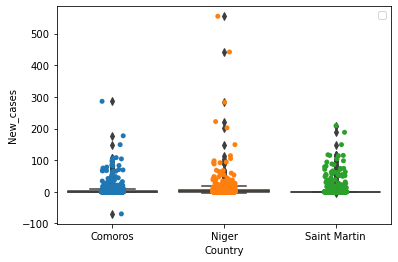

In [98]:
import seaborn as sns
sns.boxplot(x="Country", y="New_cases", data=q)
sns.stripplot(x="Country", y="New_cases", data=q);#, jitter=True, edgecolor="gray")
plt.legend()

<ipython-input-189-1cfdf2cd8944>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a.groupby('WHO_region')['Cumulative_cases',"Cumulative_deaths"].sum().plot.bar(grid=False);


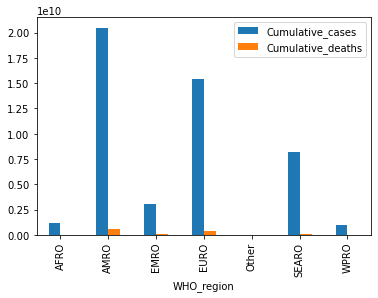

In [189]:
a.groupby('WHO_region')['Cumulative_cases',"Cumulative_deaths"].sum().plot.bar(grid=False);

7.b. <img src="Assign2.png">

<AxesSubplot:xlabel='Date_reported', ylabel='Cumulative_cases'>

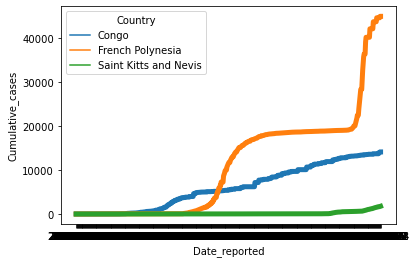

In [184]:
import matplotlib.pyplot as plt
sns.lineplot(x="Date_reported", y="Cumulative_cases", hue="Country",linewidth=5,data=q)


7.c. <img src="Assign3.png">